<a href="https://colab.research.google.com/github/blancavazquez/CursoDatosMasivosII/blob/2023-I/notebooks/1c_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensiones mediante análisis de componentes principales (ACP)
En esta libreta exploraremos la reducción de dimensiones con análisis de componentes principales (ACP). 

In [ ]:
import numpy as np

## Definición
Dado un conjunto de ejemplos $\mathbf{X} = \{\mathbf{x}^{(i)} \in \mathbb{R}^d\mid i = 1, \ldots, n\}$, el análisis de componentes principales busca encontrar los vectores $\mathbf{u}_1, \ldots, \mathbf{u}_K$, donde K es usualmente mucho menor a $d$ que maximicen la varianza. 

Esto puede lograrse obteniendo los $K$ eigenvectores con mayor eigenvalor $\lambda_1, \ldots, \lambda_K$ de la matriz de covarianza $\boldsymbol{\Sigma}$, definida por

$
\boldsymbol{\Sigma} = \frac{1}{n - 1}\sum_{i=1}^n
(\mathbf{x}^{(i)} - \boldsymbol{\mu}) (\mathbf{x}^{(i)} - \boldsymbol{\mu})^\top
$

Los $K$ eigenvectores se conocen como componentes principales.

In [ ]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components

  def fit(self, X):
    self.means = X.mean(axis=0)
    Xc = X - self.means
    cov = (Xc.T @ Xc) / (X.shape[0] - 1)
    l, u = np.linalg.eig(cov)

    ord_ = l.argsort()[::-1]
    u = u[:, ord_]
    l = l[ord_]

    self.components = u[:, :self.n_components]
    self.vars = l[:self.n_components]

  def transform(self, X):
    return (X - self.means) @ self.components

  def inverse_transform(self, Z):
    return Z @ self.components.T + self.means

## Conjunto de datos de Iris
Apliquemos el PCA que acabamos de programar en conjunto de datos de flores iris. Elegimos los atributos de ancho y largo sepal y visualizamos el conjunto.

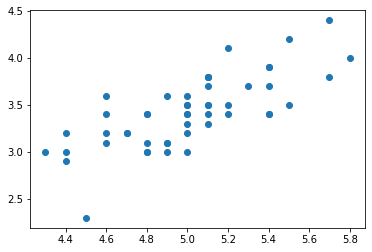

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
 
iris = load_iris()
p2d = iris['data'][:, :2]
p2d = p2d[iris['target'] == 0]

plt.scatter(p2d[:, 0], p2d[:, 1])
plt.show()

In [ ]:
pca2d = PCA(2)
pca2d.fit(p2d)

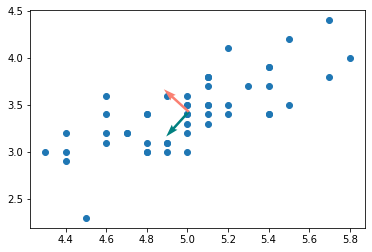

In [ ]:
plt.scatter(p2d[:, 0], p2d[:, 1])
color = ['teal', 'salmon']
for c,u in zip(color, pca2d.components):
  plt.quiver(pca2d.means[0], pca2d.means[1], u[0], u[1], color = c, scale=10)
plt.show()

In [ ]:
print(pca2d.components)
print(pca2d.vars)

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Encontramos sus 2 componentes principales

Visualizamos los componentes principales encontrados

Reducimos dimensiones del conjunto de ejemplos de 3 (ancho y largo del sépalo y ancho del pétalo). 

In [ ]:
p3d = iris['data'][:, :3]
pca3d = PCA(2)
pca3d.fit(p3d) 

In [ ]:
p3d_2c = pca3d.transform(p3d)

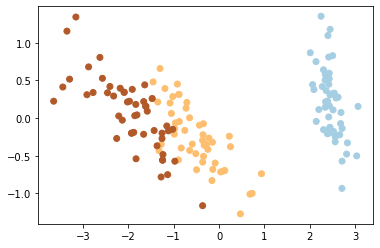

In [ ]:
from matplotlib import cm
plt.scatter(p3d_2c[:, 0], p3d_2c[:, 1], c=iris['target'], cmap=cm.Paired)
plt.show()

Comparamos los resultados con scikit-learn

In [ ]:
from sklearn.decomposition import PCA as SKPCA

skpca3d = SKPCA(2)
skpca3d.fit(p3d)

PCA(n_components=2)

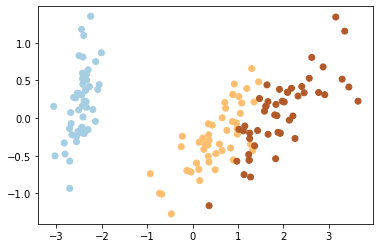

In [ ]:
skp3d_2c = skpca3d.transform(p3d)
plt.scatter(skp3d_2c[:, 0], skp3d_2c[:, 1], c=iris['target'], cmap=cm.Paired)
plt.show()

In [ ]:
U, S, V = np.linalg.svd(p2d)

In [ ]:
S

array([43.02892814,  1.48369241])

In [ ]:
class PCASVD:
  def __init__(self, n_components):
    self.n_components = n_components

  def fit(self, X):
    self.means = X.mean(axis=0)
    Xc = X - self.means
    U, S, V = np.linalg.svd(Xc)
    self.components = V[:self.n_components].T
    self.vars = S[:self.n_components]**2 / (X.shape[0] - 1)

  def transform(self, X):
    return (X - self.means) @ self.components

  def inverse_transform(self, Z):
    return Z @ self.components.T + self.means

In [ ]:
pcasvd = PCASVD(2)
pcasvd.fit(p3d)

In [ ]:
print(pcasvd.components)

[[ 0.38983343 -0.63922328]
 [-0.09100801 -0.74305866]
 [ 0.91637735  0.19813487]]


In [ ]:
print(pcasvd.vars)
print(pca3d.vars)

[3.69111979 0.24137727]


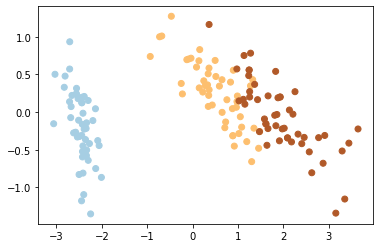

In [ ]:
svdp3d_2c = pcasvd.transform(p3d)
plt.scatter(svdp3d_2c[:, 0], svdp3d_2c[:, 1], c=iris['target'], cmap=cm.Paired)
plt.show()

In [ ]:
from sklearn.datasets import fetch_rcv1 
  
rcv1 = fetch_rcv1()

In [ ]:
pca = PCA(2)
pca.fit(rcv1.data)

## Conjunto de datos de imágenes de dígitos
Cargamos y visualizamos algunos ejemplos del conjunto de imágenes de dígitos

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits() 

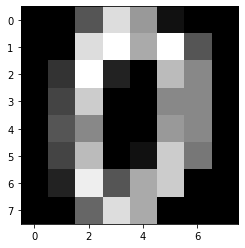

In [ ]:
plt.imshow(digits.images[0], cmap='gray')

In [ ]:
Xim = digits.images.reshape(-1, 8 * 8)

In [ ]:
pcaim = PCA(2)
pcaim.fit(Xim)

In [ ]:
Zim = pcaim.transform(Xim)

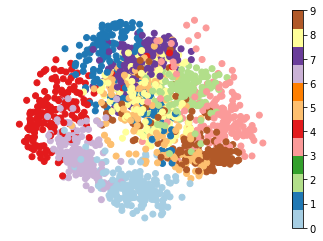

In [ ]:
plt.scatter(Zim[:, 0], Zim[:, 1], c=digits.target, cmap=cm.Paired)
plt.colorbar()
plt.axis('off')
plt.show()

Aplicamos PCA con 2 componentes a este conjunto

Visualizamos los datos proyectados en el subespacio

In [ ]:
Xim_rec = pcaim.inverse_transform(Zim)

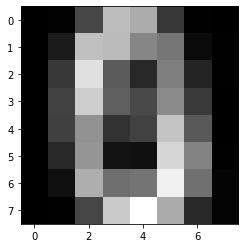

In [ ]:
plt.imshow(Xim_rec[0].reshape(8,8), cmap='gray')

In [ ]:
digits.target[0]

0

Aplicamos PCA con 40 componentes para comparar las reconstrucciones

In [ ]:
pca40im = PCA(40)
pca40im.fit(Xim)
Zim = pca40im.transform(Xim)
Xim_rec = pca40im.inverse_transform(Zim)

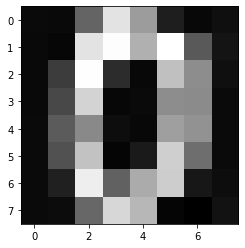

In [ ]:
plt.imshow(Xim_rec[0].reshape(8,8), cmap='gray')

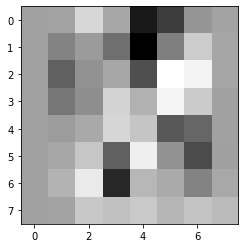

In [ ]:
plt.imshow(pca40im.components[:, 10].reshape(8,8), cmap='gray')

In [ ]:
np.mean((Xim - Xim_rec)**2)

0.22147132289280902

Una estrategia para elegir el número $K$ de componentes principales es analizar el porcentaje de la varianza explicada. Visualicemos el radio de la varianza explicada por cada componente y su porcentaje acumulado.Podemos observar que los primeros 21 componentes principales explican más del 90% de la varianza.

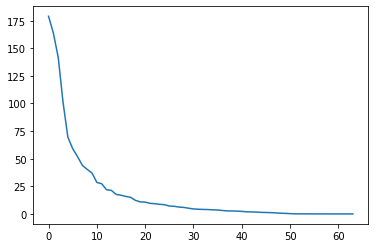

In [ ]:
pca64im = PCA(64)
pca64im.fit(Xim)
plt.plot(pca64im.vars)

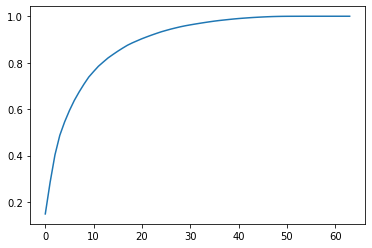

In [ ]:
plt.plot(pca64im.vars.cumsum() / pca64im.vars.sum())

In [ ]:
plt.plot(pca40im.vars)

## Reconocimiento de rostros con PCA
Ahora vamos a explorar un método sencillo de reconocimiento de rostros usando PCA, conocido como _eigenfaces_. 

Primero cargamos el conjunto de imágenes de rostros de Olivetti Research Laboratory, el cual contiene imágenes de $64\times 64$ de 40 sujetos distintos. 

Visualicemos las imágenes de 10 sujetos.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

orl = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Dividimos el conjunto en subconjuntos de entrenamiento y validación

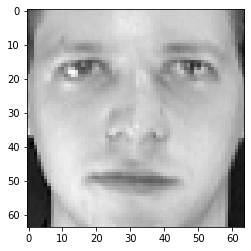

In [ ]:
plt.imshow(orl.images[0], cmap='gray')

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_prueba, y_ent, y_prueba = train_test_split(orl.images, orl.target, test_size=0.2)

Tomemos dos imágenes de un mismo rostro y de dos rostros distintos y comparémoslas.

(-0.5, 63.5, 63.5, -0.5)

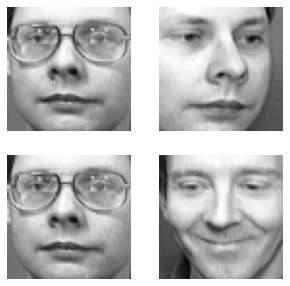

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5,5))

axs[0, 0].imshow(X_ent[y_ent==3][0], cmap='gray')
axs[0, 0].axis('off')

axs[0, 1].imshow(X_ent[y_ent==3][3], cmap='gray')
axs[0, 1].axis('off')

axs[1, 0].imshow(X_ent[y_ent==3][0], cmap='gray')
axs[1, 0].axis('off')
X_ent[y_ent==3][0]
axs[1, 1].imshow(X_ent[y_ent==2][2], cmap='gray')
axs[1, 1].axis('off')

Convertimos las imágenes a vectores de 4096 dimensiones y calculamos la distancia euclidiana entre ambos pares. 

In [ ]:
X_ent_flat = X_ent.reshape(-1, 64 * 64)

In [ ]:
np.linalg.norm(X_ent_flat[y_ent==3][0] - X_ent_flat[y_ent==3][3])

11.104076

In [ ]:
np.linalg.norm(X_ent_flat[y_ent==3][0] - X_ent_flat[y_ent==2][2])

10.583868

Como podemos observar la distancia entre las imágenes del mismo rostro es mayor a la de rostros distintos en el espacio de píxeles, por lo que no sería adecuado para el reconocimiento usar esta representación. Una forma más adecuada de representar las imágenes de los rostros es a través de sus componentes principales.

Apliquemos PCA a nuestro conjunto y visualicemos los componentes principales (_eigenfaces_).

In [ ]:
pcaface = PCA(20)
pcaface.fit(X_ent_flat)
X_ent_proj = pcaface.transform(X_ent_flat)
X_prueba_proj = pcaface.transform(X_prueba.reshape(-1, 64 * 64))

In [ ]:
np.linalg.norm(X_ent_proj[y_ent==3][0] - X_ent_proj[y_ent==3][3])

8.869694

In [ ]:
np.linalg.norm(X_ent_proj[y_ent==3][0] - X_ent_proj[y_ent==2][2])

8.21882

Calculemos la distancia euclidiana de las proyecciones de las imágenes anteriores.

Visualizamos las _eigenfaces_.

In [ ]:
pcaface.components.shape

(4096, 20)

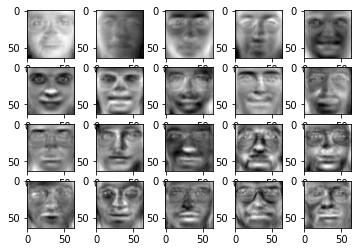

In [ ]:
for i in range(pcaface.n_components):
  plt.subplot(4, 5, i + 1)
  plt.imshow(pcaface.components.T[i].reshape(64,64), cmap='gray')

Finalmente comparamos ambas representaciones para reconocimiento de rostros entrenando y evaluando clasificadores basados en máquinas de vectores de soporte.

In [ ]:
from sklearn.datasets import fetch_rcv1

rcv1 = fetch_rcv1()

In [ ]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(20)

In [ ]:
means = np.asarray(rcv1.data.mean(axis=0))

In [ ]:
t_lote = 300
n_lotes = np.floor(rcv1.data.shape[0] / t_lote)

for i in range(int(n_lotes)):
  ipca.partial_fit(rcv1.data[i*t_lote:(i+1)*t_lote].toarray() - means)

In [ ]:
ipca.partial_fit(rcv1.data[n_lotes*t_lote:].toarray() - means)

## PCA en documentos de texto
Vamos a descargar el conjunto de datos de Reuters Corpus Volume I (RCV1) de scikit-learn (ver [https://scikit-learn.org/0.18/datasets/rcv1.html](https://scikit-learn.org/0.18/datasets/rcv1.html)) y aplicar PCA sobre el mismo.

## Ejercicio
Modifica la clase `PCA` que definimos anteriormente para hacerla más escalable y evalúala en el conjunto de datos de Reuters Corpus Volume I (ver [https://scikit-learn.org/0.18/datasets/rcv1.html](https://scikit-learn.org/0.18/datasets/rcv1.html)).